<a href="https://colab.research.google.com/github/kvbicki/ml-pyton-course/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 7.1: Implement cross-validation for your model. Use accuracy for the classifier and
negated RMSE for the regressor. For regression, convert the negated output back to RMSE.
Calculate the mean of the obtained scores.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

data = pd.read_csv('/content/drive/MyDrive/Datasets/student_lifestyle_dataset.csv')
data = data.drop('Student_ID', axis=1)

all = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', "GPA"]
without_sleep = ['Study_Hours_Per_Day',  'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', "GPA"]
without_study = [ 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', "GPA"]
features = [all, without_sleep, without_study]

mapping = {'Low' : 1, 'Moderate' : 2, 'High' : 3}
data['Stress_Level'] = data['Stress_Level'].map(mapping)
data["Study_Sleep_Ratio"] = data["Study_Hours_Per_Day"] / data["Sleep_Hours_Per_Day"]
data["Social_Study_Ratio"] = data["Social_Hours_Per_Day"] / data["Study_Hours_Per_Day"]

data_train, data_test = train_test_split(data, test_size=0.2, random_state=50)


print(data_train.shape)
print(data_test.shape)

data.describe()


(1600, 9)
(400, 9)


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Study_Sleep_Ratio,Social_Study_Ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,2.366000,1.036020,0.381766
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,0.727536,0.285940,0.261056
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,1.000000,0.505051,0.000000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,2.000000,0.822884,0.160370
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,3.000000,1.000000,0.342661
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,3.000000,1.212500,0.573846
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000,3.000000,1.941176,1.200000


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pandas as pd

y_train_clf = data_train['Stress_Level']
X_train_clf = data_train.drop(columns=['Stress_Level'])
clf = svm.SVC()

parameters_1 = {
    'kernel': ('linear', 'rbf', 'poly'),
    'C': [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}
for feature in features:
  print("Feature:", feature)
  grid_search = GridSearchCV(clf, parameters_1, cv=5, scoring='accuracy')
  grid_search.fit(X_train_clf[feature], y_train_clf)

  print(grid_search.best_params_)
  print(grid_search.best_estimator_)

  cv_res = pd.DataFrame(grid_search.cv_results_)

  display(cv_res)

  print(50*"-")


Feature: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
SVC(C=10, gamma='auto', kernel='poly')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032488,0.001618,0.007848,0.000362,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.871875,0.837500,0.828125,0.840625,0.821875,0.840000,0.017275,16
1,0.051826,0.005848,0.019259,0.001140,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.787500,0.765625,0.806250,0.771875,0.784375,0.783125,0.014059,18
2,0.030372,0.003822,0.008144,0.000106,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.906250,0.909375,0.893750,0.887500,0.896875,0.898750,0.008053,10
3,0.031714,0.000616,0.007611,0.000349,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.871875,0.837500,0.828125,0.840625,0.821875,0.840000,0.017275,16
4,0.039978,0.000752,0.016316,0.000694,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.900000,0.896875,0.893750,0.884375,0.878125,0.890625,0.008149,11
5,0.075707,0.012426,0.004526,0.000055,0.1,auto,poly,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.940625,0.953125,0.946875,0.943750,0.956250,0.948125,0.005796,5
6,0.051358,0.003121,0.007018,0.000654,1.0,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.881250,0.843750,0.859375,0.865625,0.843750,0.858750,0.014170,14
7,0.029558,0.001124,0.012631,0.000165,1.0,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.918750,0.918750,0.918750,0.925000,0.928125,0.921875,0.003953,8
8,0.026928,0.001539,0.006094,0.000066,1.0,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.906250,0.925000,0.900000,0.909375,0.896875,0.907500,0.009803,9
9,0.053907,0.006006,0.006588,0.000059,1.0,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.881250,0.843750,0.859375,0.865625,0.843750,0.858750,0.014170,14


--------------------------------------------------
Feature: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
SVC(C=10, gamma='auto', kernel='poly')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032614,0.001790,0.007668,0.000899,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.862500,0.850000,0.815625,0.812500,0.840625,0.836250,0.019425,16
1,0.048442,0.002676,0.019590,0.004471,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.825000,0.803125,0.790625,0.818750,0.818750,0.811250,0.012593,18
2,0.026101,0.000421,0.007891,0.000420,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.896875,0.878125,0.853125,0.868750,0.884375,0.876250,0.014737,8
3,0.032769,0.001576,0.007485,0.000404,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.862500,0.850000,0.815625,0.812500,0.840625,0.836250,0.019425,16
4,0.039876,0.000267,0.015609,0.000146,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.887500,0.834375,0.840625,0.853125,0.871875,0.857500,0.019725,11
5,0.106259,0.009005,0.005539,0.000068,0.1,auto,poly,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.912500,0.875000,0.871875,0.887500,0.887500,0.886875,0.014307,2
6,0.054623,0.004484,0.006876,0.000761,1.0,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.871875,0.850000,0.812500,0.812500,0.843750,0.838125,0.022913,14
7,0.030041,0.000315,0.012613,0.000204,1.0,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.906250,0.868750,0.850000,0.871875,0.890625,0.877500,0.019304,6
8,0.031572,0.002471,0.006957,0.001505,1.0,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.912500,0.871875,0.859375,0.875000,0.884375,0.880625,0.017832,5
9,0.053785,0.003474,0.006590,0.000117,1.0,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.871875,0.850000,0.812500,0.812500,0.843750,0.838125,0.022913,14


--------------------------------------------------
Feature: ['Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'GPA']
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050091,0.011997,0.009078,0.002099,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.715625,0.703125,0.740625,0.696875,0.681250,0.707500,0.019922,11
1,0.112982,0.018251,0.043572,0.009678,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.675000,0.653125,0.684375,0.659375,0.656250,0.665625,0.012022,18
2,0.086380,0.013390,0.020511,0.006430,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.737500,0.765625,0.793750,0.768750,0.728125,0.758750,0.023502,9
3,0.050494,0.015508,0.008256,0.000247,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.715625,0.703125,0.740625,0.696875,0.681250,0.707500,0.019922,11
4,0.048931,0.000524,0.018455,0.001119,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.696875,0.678125,0.703125,0.671875,0.675000,0.685000,0.012562,17
5,0.343998,0.043099,0.007433,0.000177,0.1,auto,poly,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.750000,0.781250,0.784375,0.778125,0.765625,0.771875,0.012655,4
6,0.064924,0.001269,0.007792,0.000067,1.0,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.703125,0.703125,0.743750,0.696875,0.687500,0.706875,0.019304,13
7,0.041099,0.001301,0.017601,0.004781,1.0,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.756250,0.746875,0.781250,0.740625,0.746875,0.754375,0.014334,10
8,0.052794,0.002385,0.007982,0.000567,1.0,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.753125,0.781250,0.787500,0.781250,0.759375,0.772500,0.013607,3
9,0.064047,0.000829,0.008229,0.000700,1.0,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.703125,0.703125,0.743750,0.696875,0.687500,0.706875,0.019304,13


--------------------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neural_network import MLPClassifier



y_train_clf = data_train['Stress_Level']
X_train_clf = data_train.drop(columns=['Stress_Level'])
clf = MLPClassifier(max_iter=2000, random_state=50)

param_grid = {
    'hidden_layer_sizes': [(5,),(5,10),(5,10,5)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam','sgd']
}

for feature in features:
  print("Feature:", feature)
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train_clf[feature], y_train_clf)

  print(grid_search.best_params_)
  print(grid_search.best_estimator_)

  cv_res = pd.DataFrame(grid_search.cv_results_)

  display(cv_res)


  print(50*"-")


Feature: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
{'activation': 'tanh', 'hidden_layer_sizes': (5, 10), 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 10), max_iter=2000,
              random_state=50)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.268535,0.249630,0.002495,0.000190,relu,"(5,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.868750,0.875000,0.881250,0.875000,0.887500,0.877500,0.006374,7
1,1.601590,0.297610,0.002863,0.000485,relu,"(5,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.862500,0.875000,0.875000,0.865625,0.865625,0.868750,0.005229,9
2,1.834813,0.380961,0.002734,0.000454,relu,"(5, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.893750,0.896875,0.903125,0.890625,0.909375,0.898750,0.006731,5
3,1.280865,0.150991,0.002706,0.000471,relu,"(5, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.868750,0.862500,0.875000,0.871875,0.884375,0.872500,0.007235,8
4,3.005477,0.698964,0.002943,0.000683,relu,"(5, 10, 5)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.965625,0.856250,0.875000,0.893750,0.925000,0.903125,0.038629,3
5,0.461812,0.066005,0.002391,0.000035,relu,"(5, 10, 5)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.509375,0.509375,0.509375,0.506250,0.506250,0.508125,0.001531,12
6,4.195949,0.643133,0.002933,0.000472,tanh,"(5,)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.903125,0.928125,0.893750,0.925000,0.918750,0.913750,0.013199,2
7,4.042155,0.446694,0.002441,0.000052,tanh,"(5,)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.900000,0.846875,0.865625,0.856250,0.850000,0.863750,0.019223,10
8,3.330088,0.627311,0.003257,0.000713,tanh,"(5, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.950000,0.931250,0.906250,0.921875,0.940625,0.930000,0.015130,1
9,3.132577,0.546566,0.002964,0.000611,tanh,"(5, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.803125,0.809375,0.790625,0.815625,0.778125,0.799375,0.013463,11


--------------------------------------------------
Feature: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

{'activation': 'tanh', 'hidden_layer_sizes': (5, 10), 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 10), max_iter=2000,
              random_state=50)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.461349,0.818357,0.002290,0.000031,relu,"(5,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.878125,0.793750,0.843750,0.843750,0.840625,0.840000,0.026911,8
1,3.457314,1.068181,0.003375,0.001324,relu,"(5,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.862500,0.781250,0.725000,0.840625,0.821875,0.806250,0.048614,11
2,2.289211,0.622186,0.002575,0.000486,relu,"(5, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.900000,0.825000,0.856250,0.859375,0.865625,0.861250,0.023930,3
3,2.690265,0.491467,0.002648,0.000374,relu,"(5, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.881250,0.803125,0.846875,0.859375,0.825000,0.843125,0.027056,7
4,2.225474,0.457248,0.003230,0.000823,relu,"(5, 10, 5)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.896875,0.812500,0.856250,0.862500,0.862500,0.858125,0.026926,4
5,3.021010,0.523728,0.002741,0.000451,relu,"(5, 10, 5)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.896875,0.843750,0.746875,0.843750,0.818750,0.830000,0.048758,9
6,3.375433,0.603475,0.002886,0.000456,tanh,"(5,)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.896875,0.834375,0.846875,0.843750,0.859375,0.856250,0.021830,5
7,5.062560,0.451591,0.003096,0.000319,tanh,"(5,)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.803125,0.759375,0.756250,0.781250,0.771875,0.774375,0.016933,12
8,2.615188,0.493860,0.002826,0.000317,tanh,"(5, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.915625,0.850000,0.850000,0.865625,0.850000,0.866250,0.025418,1
9,3.437394,0.451698,0.002813,0.000299,tanh,"(5, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.884375,0.831250,0.853125,0.850000,0.853125,0.854375,0.017071,6


--------------------------------------------------
Feature: ['Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'GPA']
{'activation': 'tanh', 'hidden_layer_sizes': (5, 10), 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 10), max_iter=2000,
              random_state=50)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.649693,0.322027,0.002452,0.000458,relu,"(5,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.740625,0.775000,0.793750,0.778125,0.765625,0.770625,0.017522,6
1,2.517460,0.612248,0.002648,0.000499,relu,"(5,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.737500,0.787500,0.803125,0.771875,0.762500,0.772500,0.022308,4
2,0.677683,0.046999,0.002249,0.000035,relu,"(5, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.746875,0.778125,0.796875,0.778125,0.765625,0.773125,0.016489,3
3,1.304977,0.297688,0.002664,0.000422,relu,"(5, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.725000,0.784375,0.796875,0.784375,0.765625,0.771250,0.025187,5
4,0.871381,0.076375,0.002424,0.000137,relu,"(5, 10, 5)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.753125,0.781250,0.790625,0.781250,0.762500,0.773750,0.013778,2
5,2.382713,1.861575,0.002722,0.000490,relu,"(5, 10, 5)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.518750,0.793750,0.531250,0.528125,0.768750,0.628125,0.125343,11
6,2.517582,0.377467,0.002501,0.000324,tanh,"(5,)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.740625,0.765625,0.787500,0.775000,0.765625,0.766875,0.015386,9
7,0.257958,0.016732,0.002367,0.000080,tanh,"(5,)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.509375,0.509375,0.509375,0.506250,0.506250,0.508125,0.001531,12
8,1.077059,0.103117,0.002558,0.000023,tanh,"(5, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.743750,0.762500,0.787500,0.806250,0.784375,0.776875,0.021615,1
9,2.331017,0.460890,0.002826,0.000323,tanh,"(5, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.737500,0.771875,0.796875,0.775000,0.771875,0.770625,0.019019,7


--------------------------------------------------


Task 7.2: Compare the results of 3-fold, 5-fold, and 10-fold cross-validation.


In [ ]:
SVC_MODEL = svm.SVC(C= 10, kernel = 'rbf')

folds = [3, 5, 10]

for cv in folds:
  for feature in features:
    print("Feature:", feature)
    scores_clf = cross_val_score(SVC_MODEL, X_train_clf[feature], y_train_clf, cv=cv, scoring='accuracy')

    print(f"\nCV = {cv}")
    print("Accuracy scores:", scores_clf)
    print("Mean accuracy:", scores_clf.mean())

Feature: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']

CV = 3
Accuracy scores: [0.91947566 0.90994371 0.91369606]
Mean accuracy: 0.9143718100966662
Feature: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']

CV = 3
Accuracy scores: [0.88764045 0.85178236 0.88180113]
Mean accuracy: 0.873741313039751
Feature: ['Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'GPA']

CV = 3
Accuracy scores: [0.73970037 0.75984991 0.73733583]
Mean accuracy: 0.7456287052066718
Feature: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']

CV = 5
Accuracy scores: [0.91875  0.91875  0.91875  0.925    0.928125]
Mean accuracy: 0.9218749999999998
Feature: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_D

In [ ]:
svm_all = svm.SVC(C=10, gamma='auto', kernel='poly')
svm_without_study = svm.SVC(C=10)

mlp_all = MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 10), max_iter=2000,
              random_state=50)
mlp_without_study = MLPClassifier(activation='relu',solver='sgd', hidden_layer_sizes=(10,20), max_iter=2000,
              random_state=50)

models = [svm_all, svm_without_study, mlp_all, mlp_without_study]

scores_clf = cross_validate(svm_all, X_train_clf[all], y_train_clf, cv=5, scoring='accuracy')
print("SVM with all features")
print(scores_clf)
print(scores_clf['test_score'].mean())

scores_clf = cross_validate(svm_without_study, X_train_clf[without_study], y_train_clf, cv=5, scoring='accuracy')
print("SVM without study")
print(scores_clf)
print(scores_clf['test_score'].mean())

scores_clf = cross_validate(mlp_all, X_train_clf[all], y_train_clf, cv=5, scoring='accuracy')
print("MLP with all features")
print(scores_clf)
print(scores_clf['test_score'].mean())

scores_clf = cross_validate(mlp_without_study, X_train_clf[without_study], y_train_clf, cv=5, scoring='accuracy')
print("MLP without study")
print(scores_clf)
print(scores_clf['test_score'].mean())



SVM with all features
{'fit_time': array([3.47633791, 1.20395732, 1.2186017 , 2.26999426, 4.51311016]), 'score_time': array([0.00794435, 0.00346899, 0.00359297, 0.00499582, 0.0036788 ]), 'test_score': array([0.98125 , 0.95625 , 0.971875, 0.9875  , 0.975   ])}
0.9743749999999999
SVM without study
{'fit_time': array([0.0412426 , 0.04270291, 0.04186606, 0.04357052, 0.05380058]), 'score_time': array([0.01319027, 0.01331019, 0.01319075, 0.01621366, 0.01309562]), 'test_score': array([0.771875, 0.78125 , 0.7875  , 0.778125, 0.765625])}
0.7768750000000001
MLP with all features
{'fit_time': array([3.42597222, 3.2488153 , 4.075423  , 2.74388003, 2.60912156]), 'score_time': array([0.002738  , 0.00273418, 0.00351644, 0.00266528, 0.00272751]), 'test_score': array([0.95    , 0.93125 , 0.90625 , 0.921875, 0.940625])}
0.93
MLP without study
{'fit_time': array([0.99055624, 0.92816973, 0.96401644, 0.92059612, 1.01079965]), 'score_time': array([0.00229907, 0.00227761, 0.00227547, 0.0022552 , 0.00228405])

 Train your model with the tuned hyperparameters using the full training set. Evaluate
its performance.
• For classification, assess: accuracy, recall, precision, and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X_test= data_test.drop(columns=['Stress_Level'])
y_test_clf = data_test['Stress_Level']

svm_all.fit(X_train_clf[all], y_train_clf)
y_pred = svm_all.predict(X_test[all])
print("SVM with all features")
print("Accuracy:", accuracy_score(y_test_clf, y_pred))
print("Recall:", recall_score(y_test_clf, y_pred, average='weighted'))
print("Precision:", precision_score(y_test_clf, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test_clf, y_pred, average='weighted'))
print()

svm_without_study.fit(X_train_clf[without_study], y_train_clf)
y_pred = svm_without_study.predict(X_test[without_study])
print("SVM without study")
print("Accuracy:", accuracy_score(y_test_clf, y_pred))
print("Recall:", recall_score(y_test_clf, y_pred, average='weighted'))
print("Precision:", precision_score(y_test_clf, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test_clf, y_pred, average='weighted'))
print()

mlp_all.fit(X_train_clf[all], y_train_clf)
y_pred = mlp_all.predict(X_test[all])
print("MLP with all features")
print("Accuracy:", accuracy_score(y_test_clf, y_pred))
print("Recall:", recall_score(y_test_clf, y_pred, average='weighted'))
print("Precision:", precision_score(y_test_clf, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test_clf, y_pred, average='weighted'))
print()

mlp_without_study.fit(X_train_clf[without_study], y_train_clf)
y_pred = mlp_without_study.predict(X_test[without_study])
print("MLP without study")
print("Accuracy:", accuracy_score(y_test_clf, y_pred))
print("Recall:", recall_score(y_test_clf, y_pred, average='weighted'))
print("Precision:", precision_score(y_test_clf, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test_clf, y_pred, average='weighted'))
print()




SVM with all features
Accuracy: 0.975
Recall: 0.975
Precision: 0.9752565858041329
F1 score: 0.9750243066023515

SVM without study
Accuracy: 0.7475
Recall: 0.7475
Precision: 0.7586655163525975
F1 score: 0.7435688649206444

MLP with all features
Accuracy: 0.9375
Recall: 0.9375
Precision: 0.9372694099378882
F1 score: 0.9369006875477465

MLP without study
Accuracy: 0.7275
Recall: 0.7275
Precision: 0.7318568646369354
F1 score: 0.7263373186720873



Task 7.6: For your model, prepare some of the following (consult with the teacher):
• Calculate the true positive rate, true negative rate, false positive rate, and false negative rate.
• Plot the ROC curve.
• Plot the confusion matrix.
• Plot the prediction error

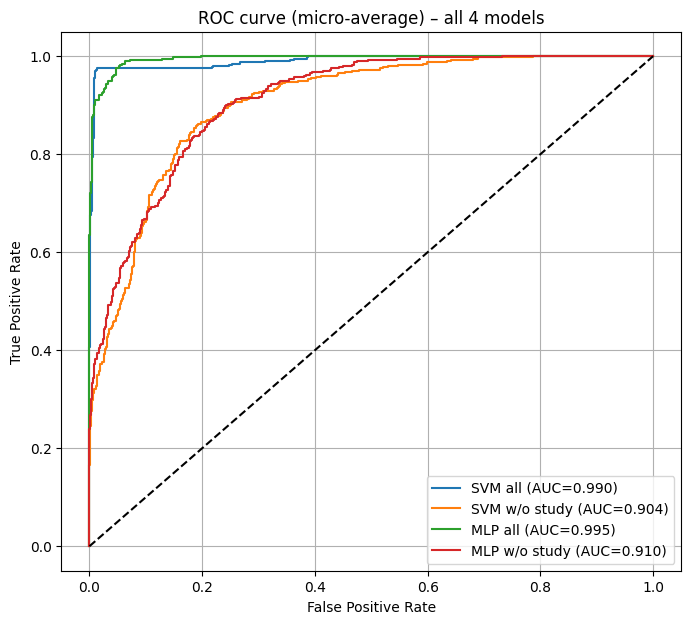

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test_clf)

s_svm_all = svm_all.decision_function(X_test[all])
s_svm_wo  = svm_without_study.decision_function(X_test[without_study])
s_mlp_all = mlp_all.predict_proba(X_test[all])
s_mlp_wo  = mlp_without_study.predict_proba(X_test[without_study])

if s_svm_all.ndim == 1: s_svm_all = s_svm_all.reshape(-1,1)
if s_svm_wo.ndim == 1:  s_svm_wo  = s_svm_wo.reshape(-1,1)

fpr1, tpr1, _ = roc_curve(y_bin.ravel(), s_svm_all.ravel())
fpr2, tpr2, _ = roc_curve(y_bin.ravel(), s_svm_wo.ravel())
fpr3, tpr3, _ = roc_curve(y_bin.ravel(), s_mlp_all.ravel())
fpr4, tpr4, _ = roc_curve(y_bin.ravel(), s_mlp_wo.ravel())

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(8,7))

plt.plot(fpr1, tpr1, label=f"SVM all (AUC={auc1:.3f})")
plt.plot(fpr2, tpr2, label=f"SVM w/o study (AUC={auc2:.3f})")
plt.plot(fpr3, tpr3, label=f"MLP all (AUC={auc3:.3f})")
plt.plot(fpr4, tpr4, label=f"MLP w/o study (AUC={auc4:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (micro-average) – all 4 models")
plt.legend()
plt.grid()
plt.show()


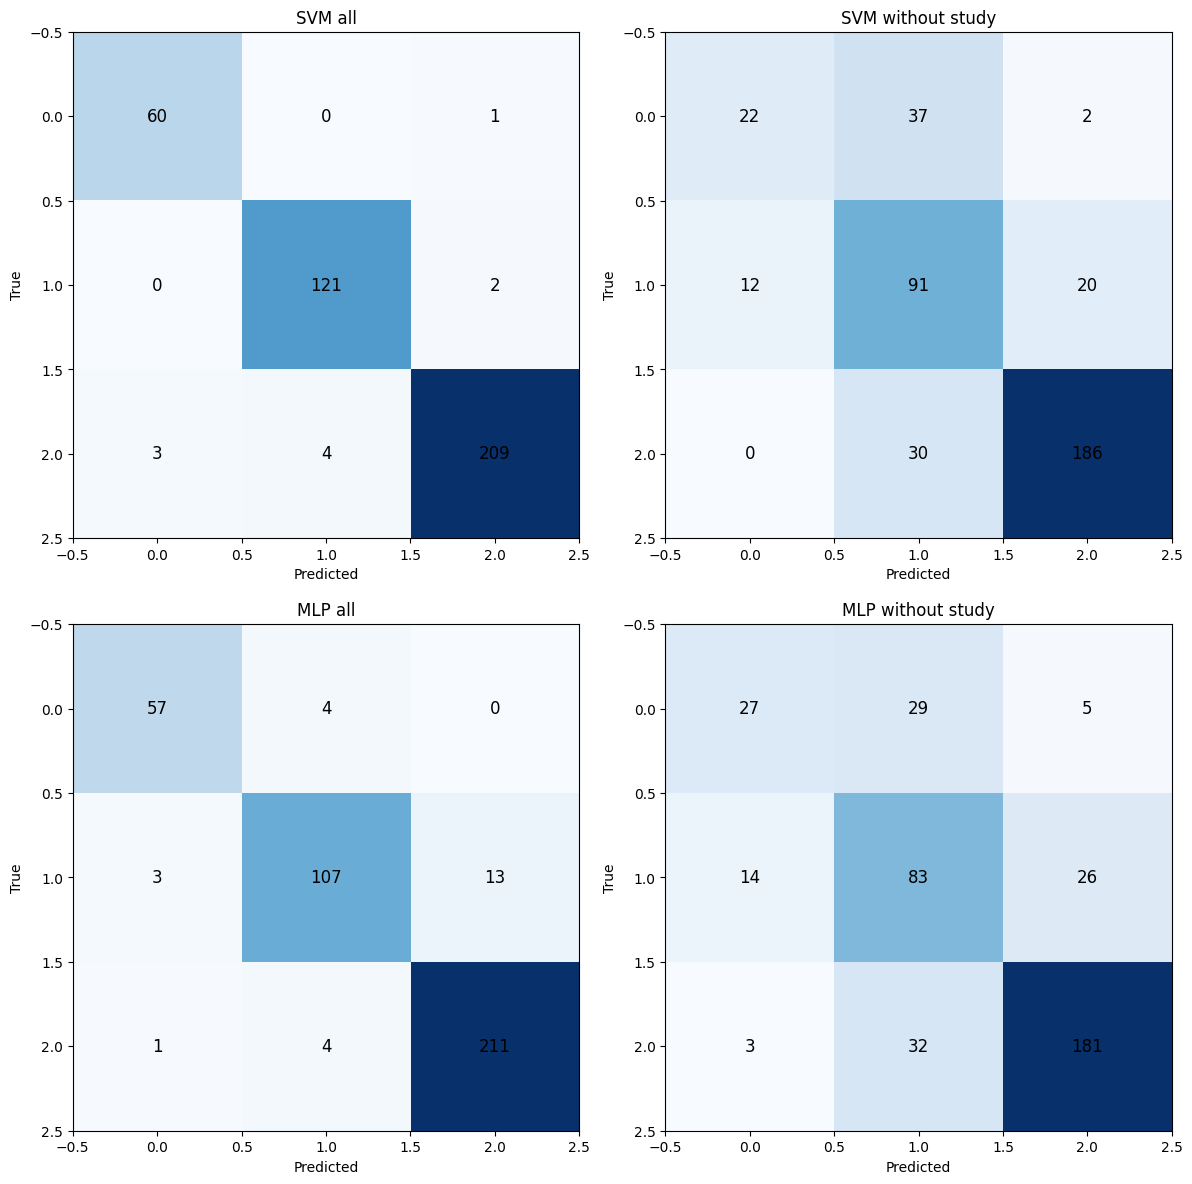

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm1 = confusion_matrix(y_test_clf, y_pred_svm_all)
cm2 = confusion_matrix(y_test_clf, y_pred_svm_wo)
cm3 = confusion_matrix(y_test_clf, y_pred_mlp_all)
cm4 = confusion_matrix(y_test_clf, y_pred_mlp_wo)

fig, axes = plt.subplots(2, 2, figsize=(12,12))

cms = [cm1, cm2, cm3, cm4]
titles = ["SVM all", "SVM without study", "MLP all", "MLP without study"]

for ax, cm, title in zip(axes.flatten(), cms, titles):
    ax.imshow(cm, cmap="Blues")
    ax.set_title(title)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]),
                    ha="center", va="center", color="black", fontsize=12)

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


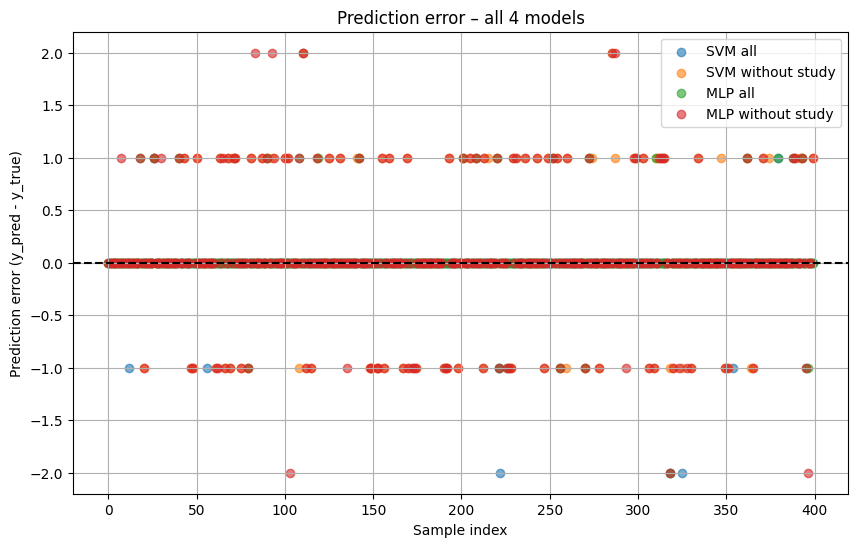

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(range(len(y_test_clf)), y_pred_svm_all - y_test_clf,
            label="SVM all", alpha=0.6)

plt.scatter(range(len(y_test_clf)), y_pred_svm_wo - y_test_clf,
            label="SVM without study", alpha=0.6)

plt.scatter(range(len(y_test_clf)), y_pred_mlp_all - y_test_clf,
            label="MLP all", alpha=0.6)

plt.scatter(range(len(y_test_clf)), y_pred_mlp_wo - y_test_clf,
            label="MLP without study", alpha=0.6)

plt.axhline(0, color="black", linestyle="--")

plt.title("Prediction error – all 4 models")
plt.xlabel("Sample index")
plt.ylabel("Prediction error (y_pred - y_true)")
plt.legend()
plt.grid()
plt.show()
